In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [41]:
# Load dataframe
usarrests_df = pd.read_csv("UsArrests.csv")
usarrests_df.head(11)

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


### EXPLORING THE DATA

To perform an in-depth analysis of the dataset and improve understanding of each variable (City, Murder, Assault, Urbanpop, and Rape), will have to observe the mean, standard deviation, range, distribution, and number of missing values for each variable in the dataset:

In [42]:
# Calsulating mean, standard deviation and range
summary = usarrests_df.describe()
print(summary)

         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000


Assault variable stands out as having the mean, standard deviation and range which are significantly higher than the other variables. A higher mean can indicate that the average level of assault incidents is substantially greater compared to other variables in the dataset and this suggest that assault may be consistently reported across cities. A high standard deviation indicates that some cities might have extremely high assault rates, while others have much lower rates. A larger range indicates that the difference between the city with the highest assault rate and the one with the lowest rate is more pronounced than for other variables. Therefore, since assault values dominate numerically, they can disproportionately influence Principal Component Analysis (PCA), and scaling the data will be crucial to ensure all variables contribute equally to the PCA.

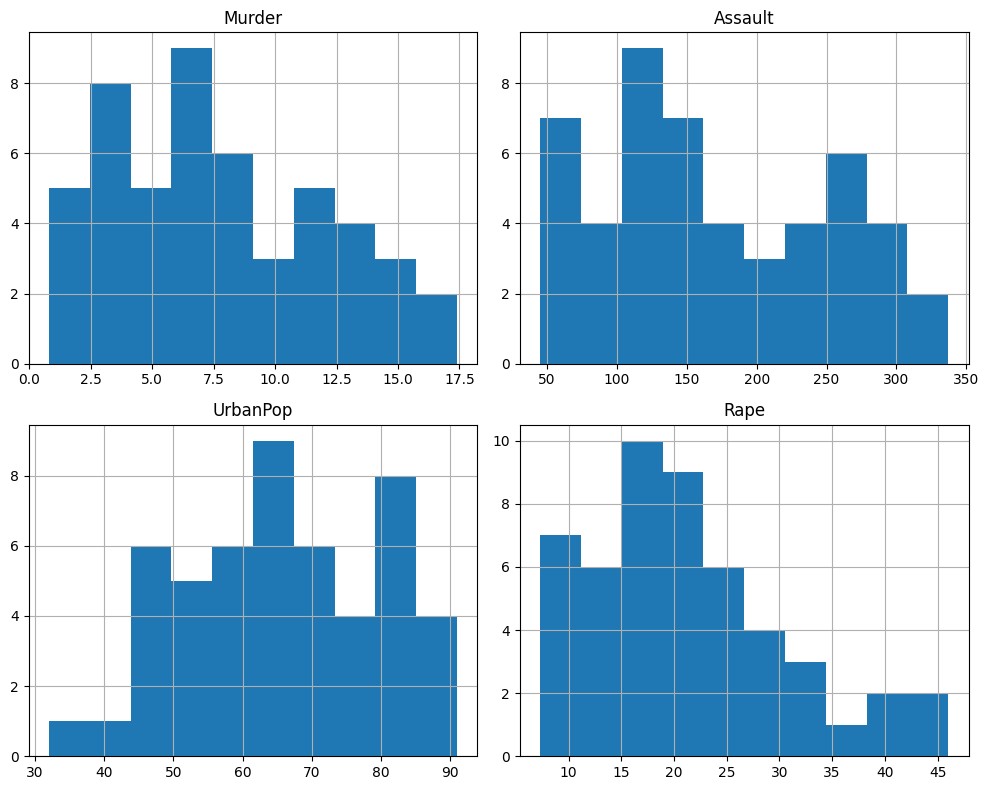

In [43]:
# visualize the frequency distribution of each variable:
usarrests_df.hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()

Based on the frequency distribution of variables, Murder, Assault and Rape variables have left skewed distribution (Negative Skew), which indicates that most cities reports high Murder, Assault and Rape incidents, with few cities repoting less of these encidents. While UrbanPop has right skewed distribution (Positive Skew) which suggests that most cities have less urban populations, with a few cities having significantly high urban populations.  

### MISSING VALUES

When working with data, it is essential to check for any missing values to ensure the reliability and completeness of the insights that can be derived. Missing values can compromise the integrity of the analysis, potentially leading to biased results or incomplete conclusions. The following section will explore the dataset to identify and address any missing values.

In [44]:
# Checking the missing values in the dataset
usarrests_df.shape
usarrests_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [45]:
# Check unique values in Murder column
usarrests_df['Murder'].unique()

array([13.2, 10. ,  8.1,  8.8,  9. ,  7.9,  3.3,  5.9, 15.4, 17.4,  5.3,
        2.6, 10.4,  7.2,  2.2,  6. ,  9.7,  2.1, 11.3,  4.4, 12.1,  2.7,
       16.1,  4.3, 12.2,  7.4, 11.4, 11.1, 13. ,  0.8,  7.3,  6.6,  4.9,
        6.3,  3.4, 14.4,  3.8, 12.7,  3.2,  8.5,  4. ,  5.7,  6.8])

In [46]:
# Check unique values in Assault column
usarrests_df['Assault'].unique()

array([236, 263, 294, 190, 276, 204, 110, 238, 335, 211,  46, 120, 249,
       113,  56, 115, 109,  83, 300, 149, 255,  72, 259, 178, 102, 252,
        57, 159, 285, 254, 337,  45, 151, 106, 174, 279,  86, 188, 201,
        48, 156, 145,  81,  53, 161])

In [47]:
# Check unique values in UrbanPop column
usarrests_df['UrbanPop'].unique()

array([58, 48, 80, 50, 91, 78, 77, 72, 60, 83, 54, 65, 57, 66, 52, 51, 67,
       85, 74, 44, 70, 53, 62, 81, 56, 89, 86, 45, 75, 68, 87, 59, 32, 63,
       73, 39])

In [48]:
# Check unique values in Rape column
usarrests_df['Rape'].unique()

array([21.2, 44.5, 31. , 19.5, 40.6, 38.7, 11.1, 15.8, 31.9, 25.8, 20.2,
       14.2, 24. , 21. , 11.3, 18. , 16.3, 22.2,  7.8, 27.8, 35.1, 14.9,
       17.1, 28.2, 16.4, 16.5, 46. ,  9.5, 18.8, 32.1, 26.1, 16.1,  7.3,
       21.4, 20. , 29.3,  8.3, 22.5, 12.8, 26.9, 25.5, 22.9, 11.2, 20.7,
       26.2,  9.3, 10.8, 15.6])

The dataset does not contain any missing values, which indicates that the data is in good condition for analysis. The absence of missing values ensures the reliability and completeness of the insights we can derive. However, if the dataset had a significant number of missing values, it could compromise the validity of our analysis. In such cases, the presence of extensive gaps in the data might lead to biased results, incomplete conclusions, or the need for complex imputation techniques. Therefore, to handle datasets with missing values, strategies such as data imputation, removal of incomplete records, or using algorithms that can handle missing data would be required. These approaches, while helpful, could still introduce uncertainties or reduce the overall quality of the analysis. Therefore, having a complete dataset from the outset saves time, enhances the accuracy of findings, and simplifies the analytical process.

### CORRELATION ANALYSIS

In order to identify patterns and dependencies that may exist between variables to enable the analysts, the correlation analysis will be perfomed in the section below:

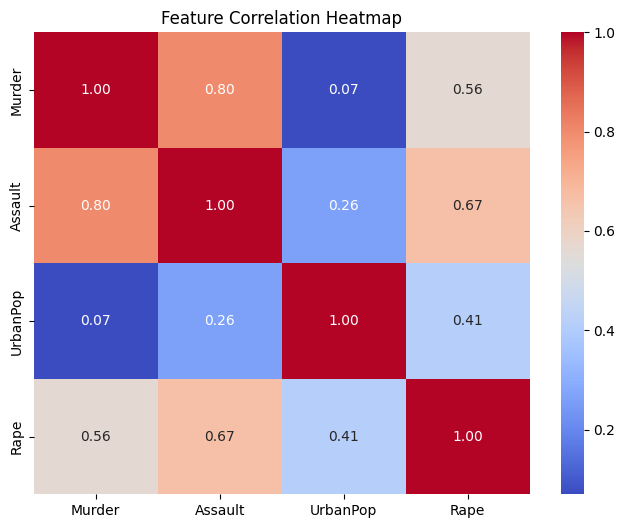

In [49]:
# drop country column non-numerical column
usarrests_df = usarrests_df.drop(columns=['City'])
usarrests_df

# Calculate correlation matrix
correlation_matrix = usarrests_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

The correlation report reveals that Murder has a relatively strong positive correlation with Assault, indicating that a significant contributor to the high murder rate in the US is likely the prevalence of assaults. This suggests a potential relationship between violent crimes, where areas with higher rates of assaults may also experience elevated murder rates. Similarly, there is a positive correlation between Rape and Assault, which suggests that assault is also a major contributor to the high rate of rape in the US. These findings highlight the interconnected nature of violent crimes and the potential overlap in their contributing factors. On the other hand, the correlation report shows little to no correlation between Murder and UrbanPop, Assault and UrbanPop, or Rape and UrbanPop. This indicates that the level of urbanization, as measured by population living in urban areas, has minimal influence on the rates of these crimes. This lack of correlation suggests that other factors, such as socioeconomic conditions, law enforcement presence, or cultural elements, may play a more significant role in explaining crime rates than urbanization alone. Overall, there are many variables that have strong negative and positive correlations with each other. This makes the data a good candidate for
PCA

### DATA SCALING

In order to perform PCA, it is crucial to scale the data because PCA is sensitive to the scale of the variables. Variables with larger ranges can dominate the analysis, leading to biased results and misrepresentation of the underlying patterns in the data. Scaling ensures that all variables contribute equally to the principal components by standardizing their ranges. The section below will focus on scaling the dataset to prepare it for analysis and then performing PCA to identify the key components that capture the most variance in the data.

In [50]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(usarrests_df)

# Apply PCA
pca = PCA(n_components=4)
pca_data = pca.fit_transform(scaled_data)

# Principal Components Correlation Coefficients
loadings = pca.components_

# Number of features before PCA
n_features = pca.n_features_in_

# Feature names before PCA (use column names of DataFrame)
feature_names = list(usarrests_df.columns)  # Extract column names

# PC names
pc_list = [f'PC{i}' for i in range(1, n_features + 1)]

# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))

# Matrix of Correlation Coefficients between feature names and PCs
loadings_df = pd.DataFrame(pc_loadings, index=feature_names)
loadings_df.index.name = 'Feature Names'  # Rename index for clarity

# Display the DataFrame
loadings_df

,PC1,PC2,PC3,PC4
Feature Names,,,,
Murder,0.535899,-0.418181,-0.341233,-0.649228
Assault,0.583184,-0.187986,-0.268148,0.743407
UrbanPop,0.278191,0.872806,-0.378016,-0.133878
Rape,0.543432,0.167319,0.817778,-0.089024


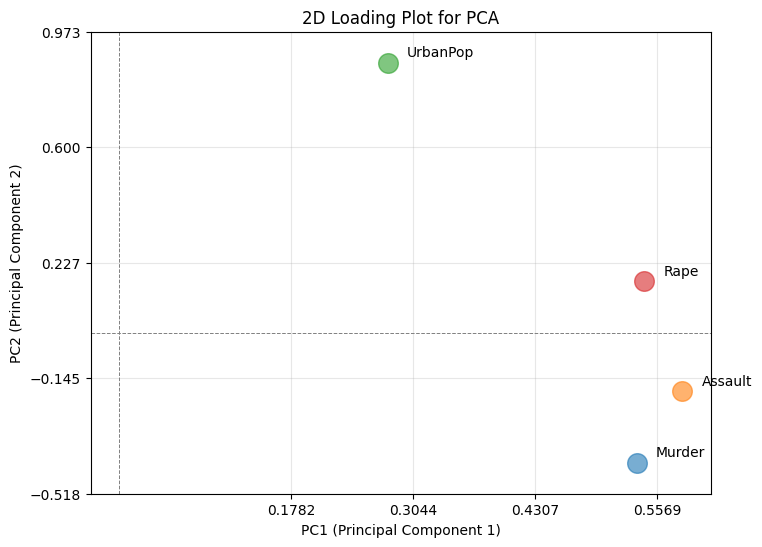

In [51]:
# Get the loadings of x and y axes (PC1 and PC2)
xs = loadings[0]  # PC1 loadings
ys = loadings[1]  # PC2 loadings

# Plot the loadings on a scatterplot
plt.figure(figsize=(8, 6))
for i, varname in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200, label=varname, alpha=0.6)
    plt.text(xs[i] + 0.02, ys[i] + 0.02, varname, fontsize=10)

# Define the axes and ticks
xticks = np.linspace(min(xs) - 0.1, max(xs) + 0.1, num=5)
yticks = np.linspace(min(ys) - 0.1, max(ys) + 0.1, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)

plt.xlabel('PC1 (Principal Component 1)')
plt.ylabel('PC2 (Principal Component 2)')
plt.title('2D Loading Plot for PCA')
plt.grid(alpha=0.3)
plt.show()

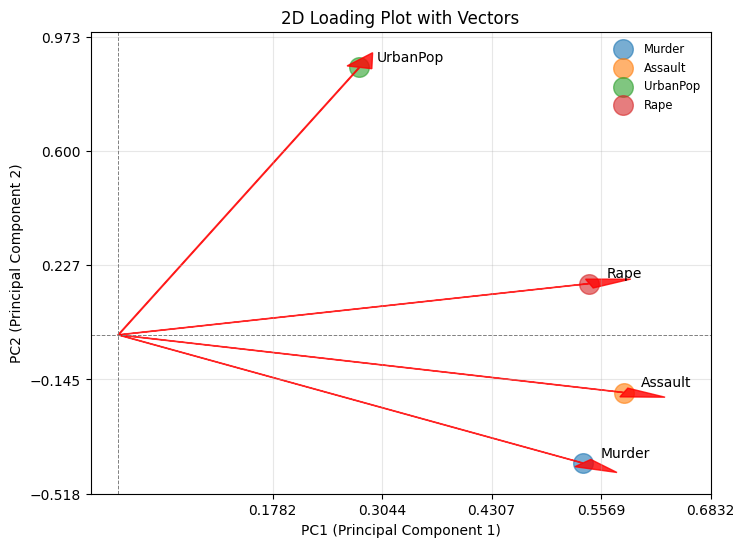

In [ ]:
# Get the loadings of x and y axes (PC1 and PC2)
xs = loadings[0]  
ys = loadings[1]  

# Plot the loadings on a scatterplot
plt.figure(figsize=(8, 6))
for i, varname in enumerate(feature_names):
    # Plot data points
    plt.scatter(xs[i], ys[i], s=200, alpha=0.6, label=varname)
    
    # Add arrows to represent loadings
    plt.arrow(
        0, 0,  # Arrow base coordinates
        xs[i],  # Length of the arrow along x-axis
        ys[i],  # Length of the arrow along y-axis
        color='r',  # Arrow color
        head_width=0.03,  # Arrowhead width
        head_length=0.05,  # Arrowhead length
        alpha=0.8
    )
    
    # Annotate features
    plt.text(xs[i] + 0.02, ys[i] + 0.02, varname, fontsize=10)

# Define the axes and ticks
xticks = np.linspace(min(xs) - 0.1, max(xs) + 0.1, num=5)
yticks = np.linspace(min(ys) - 0.1, max(ys) + 0.1, num=5)
plt.xticks(xticks)
plt.yticks(yticks)

# Add axes lines
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)

# Label axes and set the title
plt.xlabel('PC1 (Principal Component 1)')
plt.ylabel('PC2 (Principal Component 2)')
plt.title('2D Loading Plot with Vectors')
plt.grid(alpha=0.3)
plt.legend(loc='best', fontsize='small', frameon=False)

# Show the plot
plt.show()


The biplots reveal significant patterns in the relationship between the variables in the dataset. **Assault** emerges as the variable with the highest variance, as indicated by its dominant contribution to PC1. This dominance suggests that Assault rates are a major factor distinguishing states in the dataset. Moreover, the alignment of **Murder** and **Rape** vectors with Assault along PC1 highlights a strong correlation between these variables, implying that states with high Assault rates are likely to experience elevated levels of Murder and Rape. This correlation suggests that Assault may be a contributing factor to the prevalence of other violent crimes. In contrast, **UrbanPop** shows a stronger association with PC2 than PC1, indicating that urbanization and population density trends distinguish states along PC2 but are less directly linked to violent crime patterns. Overall, Assault emerges as the primary driver of variance in the dataset, with UrbanPop reflecting urbanization-related variations that are comparatively independent of violent crimes.








The first two principal components (PCs) typically capture the most variation in the data, making them important for understanding the dataset's structure. When using PCA for dimensionality reduction, it is important to select an appropriate number of PCs that account for a significant portion of the variance. This decision is guided by visualizations such as the Scree plot and the Cumulative Explained Variance plot. The Scree plot helps identify the point where adding more components contributes minimal additional variance, while the Cumulative Explained Variance plot shows how much total variance is explained by a chosen number of PCs. If these plots indicate that the first two PCs explain a substantial amount of the variance, then focusing on them is justified.

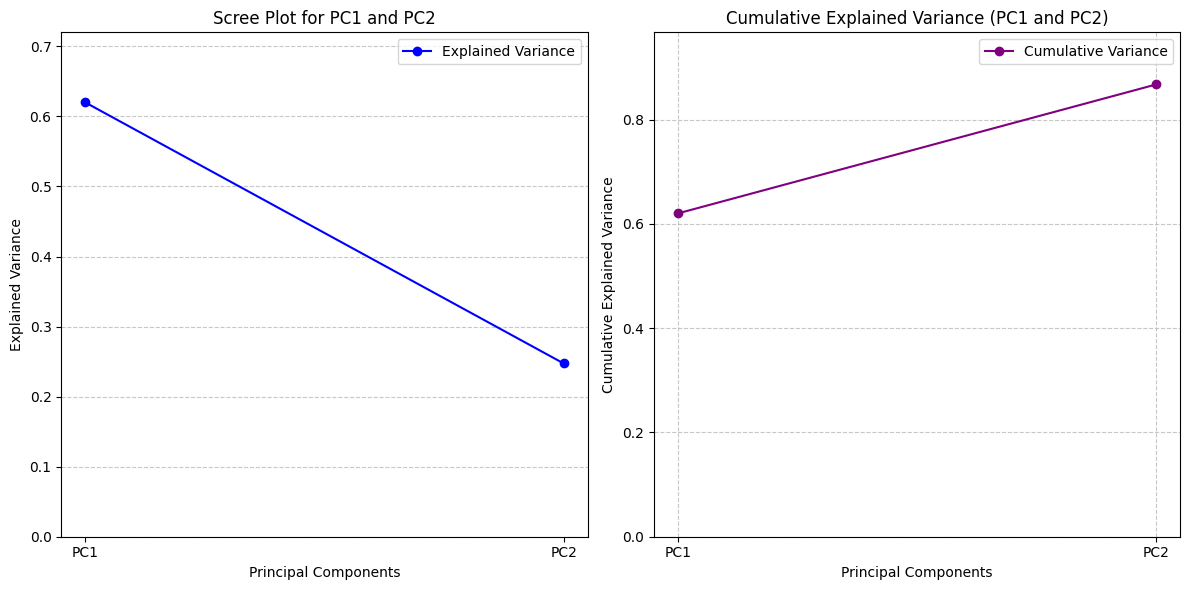

In [53]:
# Calculate Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_

# Calculate Cumulative Explained Variance
cumulative_variance = np.cumsum(explained_variance)

# Scree Plot
plt.figure(figsize=(12, 6))

# Scree Plot for PC1 and PC2 (Line Plot)
plt.subplot(1, 2, 1)  # First subplot
plt.plot(['PC1', 'PC2'], explained_variance[:2], marker='o', linestyle='-', color='blue', label='Explained Variance')
plt.title('Scree Plot for PC1 and PC2')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.ylim(0, max(explained_variance[:2]) + 0.1)  # Adjust y-limit for better display
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Cumulative Explained Variance Plot
plt.subplot(1, 2, 2)  # Second subplot
plt.plot(['PC1', 'PC2'], cumulative_variance[:2], marker='o', linestyle='-', color='purple', label='Cumulative Variance')
plt.title('Cumulative Explained Variance (PC1 and PC2)')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.ylim(0, max(cumulative_variance[:2]) + 0.1)  # Adjust y-limit for better display
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend()

# Adjust layout for clarity
plt.tight_layout()
plt.show()


### Hierarchical clustering


The section below focuses on hierarchical clustering. One advantage of hierarchical clustering is that the clusters can be visualized using a dendrogram, allowing for a clear depiction of the clustering structure. Additionally, it does not require specifying the number of clusters before running the algorithm; however, the number of clusters must be determined after the algorithm has been executed.

In [54]:
# Select useful features
X = usarrests_df[['Murder', 'Assault', 'UrbanPop', 'Rape']].values
print('Data size:')
print(X.shape)

Data size:
(50, 4)


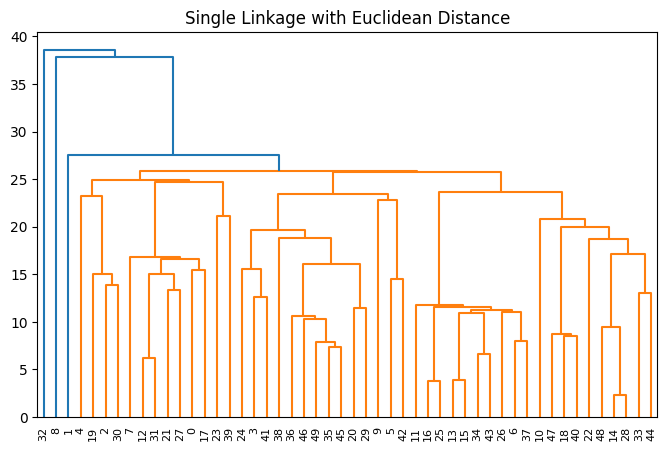

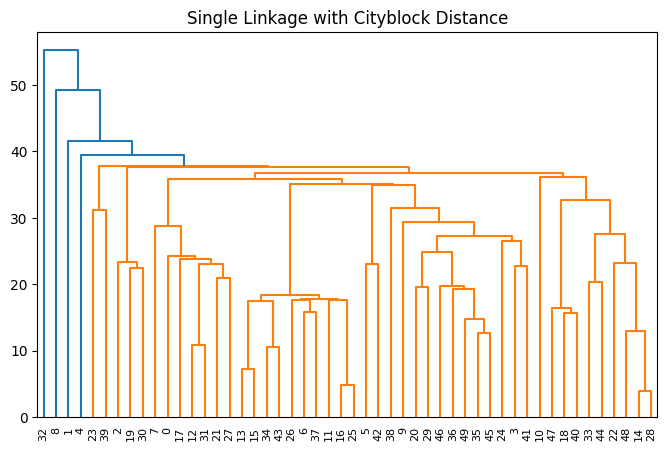

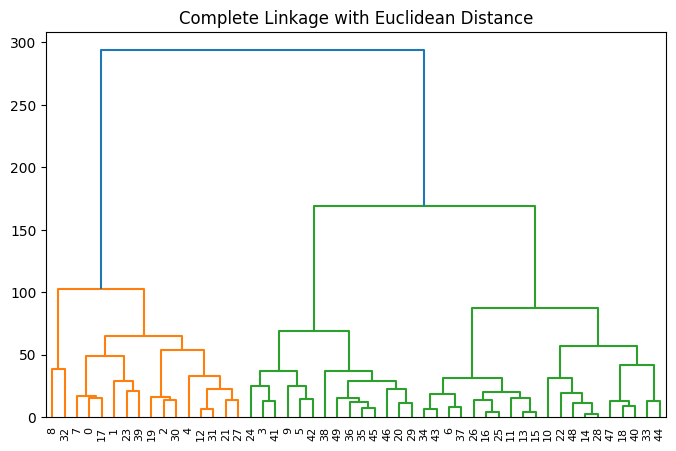

In [55]:
# Dendrogram for Single linkage and Euclidean distance combination
linkage_matrix = linkage(X, method='single', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(8, 5))
dendrogram(linkage_matrix)
plt.title("Single Linkage with Euclidean Distance")
plt.show()

# Dendrogram for Single linkage and Cityblock distance combination
linkage_matrix = linkage(X, method='single', metric='cityblock')

# Plot dendrogram
plt.figure(figsize=(8, 5))
dendrogram(linkage_matrix)
plt.title("Single Linkage with Cityblock Distance")
plt.show()

# Dendrogram for Complete linkage and Cityblock distance combination
linkage_matrix = linkage(X, method='complete', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(8, 5))
dendrogram(linkage_matrix)
plt.title("Complete Linkage with Euclidean Distance")
plt.show()


The green cluster, which has a height of approximately 175 in the dendrogram, represents cities characterized by high crime rates across various categories such as murder, assault, and rape, but these cities also have relatively low levels of urban population (urbanpop). This indicates that these cities are more prone to violent crimes despite having smaller or less densely populated urban areas. On the other hand, the yellow cluster, with a height of about 100, represents cities with a significantly higher urban population (urbanpop) but notably lower crime rates. This suggests that these cities, while more urbanized, have managed to maintain lower incidences of violent crimes. The clustering analysis was conducted with 𝑘=3 , which means the data was divided into three distinct clusters, likely separating cities based on their unique combinations of urbanization and crime rate profiles.

### K-means

The section below highlights K-means, a widely used partitioning algorithm for clustering that is both fast and efficient, making it well-suited for handling large datasets. The algorithm operates iteratively, allowing data points to shift between clusters during the process until it reaches a local optimum. However, K-means has limitations, including its sensitivity to noisy data and outliers, and its unsuitability for clusters with non-convex shapes. Additionally, a key drawback of this method is the requirement to specify the number of clusters (K) beforehand.

For this analysis, the elbow kmean was used to determing the value of K, the K value was determined to be 3. The calculated K means value will be applied to the data in order to group the similar data points into clusters.

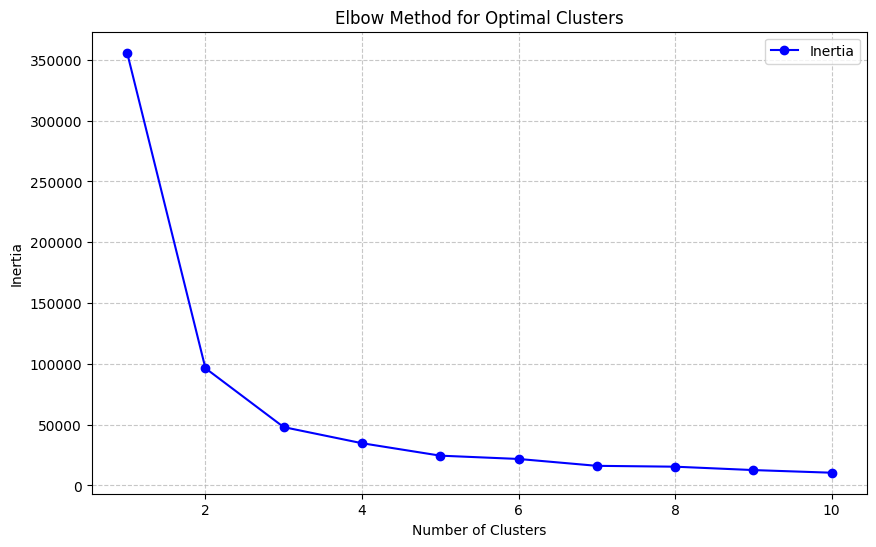

In [56]:
# Data: Use all columns from usarrests_df for clustering
data = usarrests_df[['Murder', 'Assault', 'UrbanPop', 'Rape']]  

# Maximum number of clusters to evaluate
max_k = 10

# Variables to store results
cluster_counts = []
inertias = []

# Calculate inertias for different numbers of clusters
for k in range(1, max_k + 1):  # Loop from 1 to max_k (inclusive)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)

    cluster_counts.append(k)
    inertias.append(kmeans.inertia_)

# Generate the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(cluster_counts, inertias, marker='o', linestyle='-', color='blue', label='Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

### Applying K-mean Clustering to Data

In [57]:
# Applying KMeans to the data frame
kmeans = KMeans(n_clusters=3)
kmeans.fit(usarrests_df[['Murder', 'Assault', 'UrbanPop', 'Rape']])

# Assign the cluster labels to the DataFrame
usarrests_df['kmeans_3'] = kmeans.labels_
usarrests_df.head()

,Murder,Assault,UrbanPop,Rape,kmeans_3
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,2


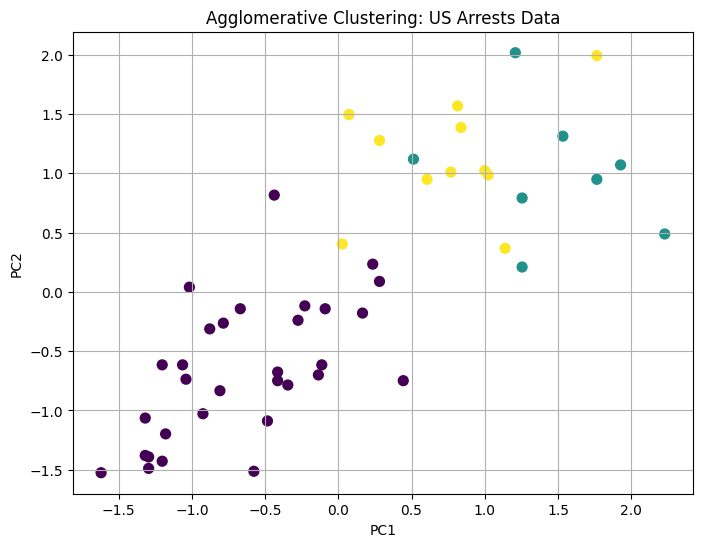

In [58]:
# Agglomerative clustering
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
labels = cluster.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering: US Arrests Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

The scatter plot reveals distinct groupings of the cities based on crime rates and urban population. The purple bubbles, positioned lower left, likely represent states with low crime rates and smaller urban populations. The yellow bubbles, centered and leaning slightly right, correspond to states with moderate crime rates and urban populations. Meanwhile, the blue bubbles, higher and further right, indicate states with higher crime rates and larger urban populations. This clustering highlights variations in crime and urbanization patterns across states, with each group reflecting unique demographic and criminal profiles.